In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from sklearn.utils import resample
from keras.optimizers import SGD
from keras.models import model_from_json
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# # prepare the data
# def create_dataset(data):
#     dataX, dataY = [],[]
#     for i in range(len(data)):
#         dataX.append(data[i][1:-2])
#         dataY.append(data[i][-2])
        
#     return np.array(dataX), np.array(dataY)

# prepare the data
def create_dataset(data, exclude):
    dataX, dataY = [],[]
    for i in range(len(data)):
        dataX.append(data[i][1:-exclude-1])
        dataY.append(data[i][-exclude-1])
        
    return np.array(dataX), np.array(dataY)

def evaluate_case(data, eva_model):
    evaluate_cases = {}
    for i in range(eva_model):
        dataY = [data[ii][-eva_model+i] for ii in range(len(data))]
        evaluate_cases[i] = dataY
        
    return evaluate_cases

# Mean Absolute Percentage Error
def mean_absolute_percentage_error(data_true, data_predict):
    error = 0
    count = 0
    for i in range(len(data_true)):
        if data_true[i] == 0:
            continue
        error += np.abs((data_true[i]-data_predict[i])/(data_true[i]))
        count += 1
        
    return((error/count)*100)

# bootstrapping 
def bootstrap(dataset, sample_size):
    
    sample_size = int(len(train)*0.8)
    boot = resample(train, replace=True, n_samples=sample_size, random_state=2)
    
    return boot

In [116]:
filename = "two_years.csv"
dataset = pd.read_csv(filename)
dataset = dataset.dropna()
dataset = dataset.values

# normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# # prepare the data

# split into train and test sets
train_test_ratio = 0.6
train_size = int(len(dataset)*train_test_ratio)

train, test = dataset[:train_size], dataset[train_size:]

# validation_size = int(len(dataset)*0.2)+train_size
# test_size = len(dataset) - train_size

# train = dataset[:train_size,:]
# validation = dataset[train_size:validation_size,:]
# test = dataset[train_size:len(dataset),:]

In [152]:
# exclude numbers of panels (2 normal + 2 anormaly) from training
exclude = 2
evaluateY = evaluate_case(test, exclude)
# evaluateY = [test[i][exclude] for i in range(len(test))]

# create train and test dataset
trainX, trainY = create_dataset(train, exclude)
testX, testY = create_dataset(test, exclude)

In [151]:
model = Sequential()
model.add(Dense(32, input_dim=trainX.shape[1], kernel_initializer='he_uniform'))
model.add(Activation('relu'))
# model.add(Dense(32))
# model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))
opt = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_absolute_error', optimizer=opt)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                256       
_________________________________________________________________
activation_20 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_22 (Activation)   (None, 1)                 0         
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
____________________________________________________

In [79]:
history = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=1000, 
                    batch_size=100, verbose=1)

Train on 67207 samples, validate on 44806 samples
Epoch 1/1000
67207/67207 [==============================] - 1s 11us/step - loss: 0.0146 - val_loss: 0.0133
Epoch 2/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0094 - val_loss: 0.0167
Epoch 3/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0092 - val_loss: 0.0141
Epoch 4/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0091 - val_loss: 0.0126
Epoch 5/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0089 - val_loss: 0.0141
Epoch 6/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0088 - val_loss: 0.0145
Epoch 7/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0088 - val_loss: 0.0119
Epoch 8/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0087 - val_loss: 0.0137
Epoch 9/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0087 - val_loss: 0

67207/67207 [==============================] - 1s 10us/step - loss: 0.0077 - val_loss: 0.0120
Epoch 78/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0078 - val_loss: 0.0142
Epoch 79/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0078 - val_loss: 0.0105
Epoch 80/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0077 - val_loss: 0.0100
Epoch 81/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0077 - val_loss: 0.0147
Epoch 82/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 83/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0077 - val_loss: 0.0100
Epoch 84/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0077 - val_loss: 0.0119
Epoch 85/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0077 - val_loss: 0.0143
Epoch 86/1000
67207/67207 [=======================

67207/67207 [==============================] - 1s 9us/step - loss: 0.0075 - val_loss: 0.0113
Epoch 154/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0075 - val_loss: 0.0132
Epoch 155/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0074 - val_loss: 0.0103
Epoch 156/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0075 - val_loss: 0.0137
Epoch 157/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0075 - val_loss: 0.0116
Epoch 158/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0074 - val_loss: 0.0120
Epoch 159/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0075 - val_loss: 0.0110
Epoch 160/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0075 - val_loss: 0.0128
Epoch 161/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0074 - val_loss: 0.0120
Epoch 162/1000
67207/67207 [============

67207/67207 [==============================] - 1s 9us/step - loss: 0.0070 - val_loss: 0.0099
Epoch 304/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0070 - val_loss: 0.0097
Epoch 305/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0070 - val_loss: 0.0112
Epoch 306/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0070 - val_loss: 0.0099
Epoch 307/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0071 - val_loss: 0.0109
Epoch 308/1000
67207/67207 [==============================] - 1s 11us/step - loss: 0.0071 - val_loss: 0.0101
Epoch 309/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0070 - val_loss: 0.0119
Epoch 310/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0071 - val_loss: 0.0127
Epoch 311/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0071 - val_loss: 0.0109
Epoch 312/1000
67207/67207 [===========

Epoch 379/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0069 - val_loss: 0.0104
Epoch 380/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0069 - val_loss: 0.0105
Epoch 381/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0069 - val_loss: 0.0104
Epoch 382/1000
67207/67207 [==============================] - 1s 11us/step - loss: 0.0069 - val_loss: 0.0107
Epoch 383/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0069 - val_loss: 0.0112
Epoch 384/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0069 - val_loss: 0.0107
Epoch 385/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0069 - val_loss: 0.0106
Epoch 386/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0069 - val_loss: 0.0121
Epoch 387/1000
67207/67207 [==============================] - 1s 10us/step - loss: 0.0069 - val_loss: 0.0107
Epoch 388/1000
67207/67

Epoch 530/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0111
Epoch 531/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0102
Epoch 532/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0067 - val_loss: 0.0145
Epoch 533/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0067 - val_loss: 0.0104
Epoch 534/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0141
Epoch 535/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0100
Epoch 536/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0067 - val_loss: 0.0098
Epoch 537/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0113
Epoch 538/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0067 - val_loss: 0.0125
Epoch 539/1000
67207/67207 [

Epoch 681/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0065 - val_loss: 0.0114
Epoch 682/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0065 - val_loss: 0.0097
Epoch 683/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0065 - val_loss: 0.0103
Epoch 684/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0065 - val_loss: 0.0133
Epoch 685/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0065 - val_loss: 0.0103
Epoch 686/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0065 - val_loss: 0.0129
Epoch 687/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0065 - val_loss: 0.0109
Epoch 688/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0066 - val_loss: 0.0108
Epoch 689/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0065 - val_loss: 0.0102
Epoch 690/1000
67207/67207 [

Epoch 832/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0126
Epoch 833/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0138
Epoch 834/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0064 - val_loss: 0.0121
Epoch 835/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0107
Epoch 836/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0100
Epoch 837/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0132
Epoch 838/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0100
Epoch 839/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0122
Epoch 840/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0130
Epoch 841/1000
67207/67207 [

Epoch 908/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0114
Epoch 909/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0063 - val_loss: 0.0112
Epoch 910/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0104
Epoch 911/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0063 - val_loss: 0.0098
Epoch 912/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0123
Epoch 913/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0100
Epoch 914/1000
67207/67207 [==============================] - 1s 8us/step - loss: 0.0063 - val_loss: 0.0104
Epoch 915/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0111
Epoch 916/1000
67207/67207 [==============================] - 1s 9us/step - loss: 0.0064 - val_loss: 0.0103
Epoch 917/1000
67207/67207 [

In [80]:
# evaluate the model
train_mse = model.evaluate(trainX, trainY, verbose=0)
test_mse = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.006, Test: 0.010


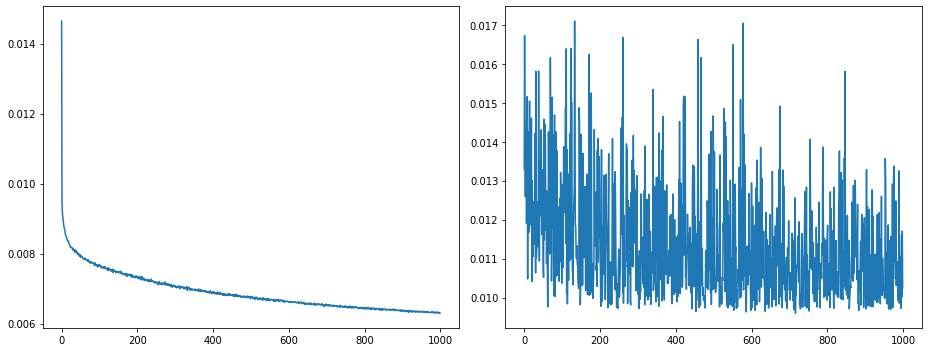

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axes[0].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
fig.tight_layout()

In [91]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

train_predict = [i for i in trainPredict]
test_predict = [i for i in testPredict]
prediction = train_predict + test_predict

# prediction = test_predict

In [92]:
for i in evaluateY:
    a = mean_absolute_percentage_error(evaluateY[i], testPredict)
#     a = mean_absolute_error(evaluateY[i], predictions)
    print(a)

[21.322393]
[26.956982]


(0, 1)

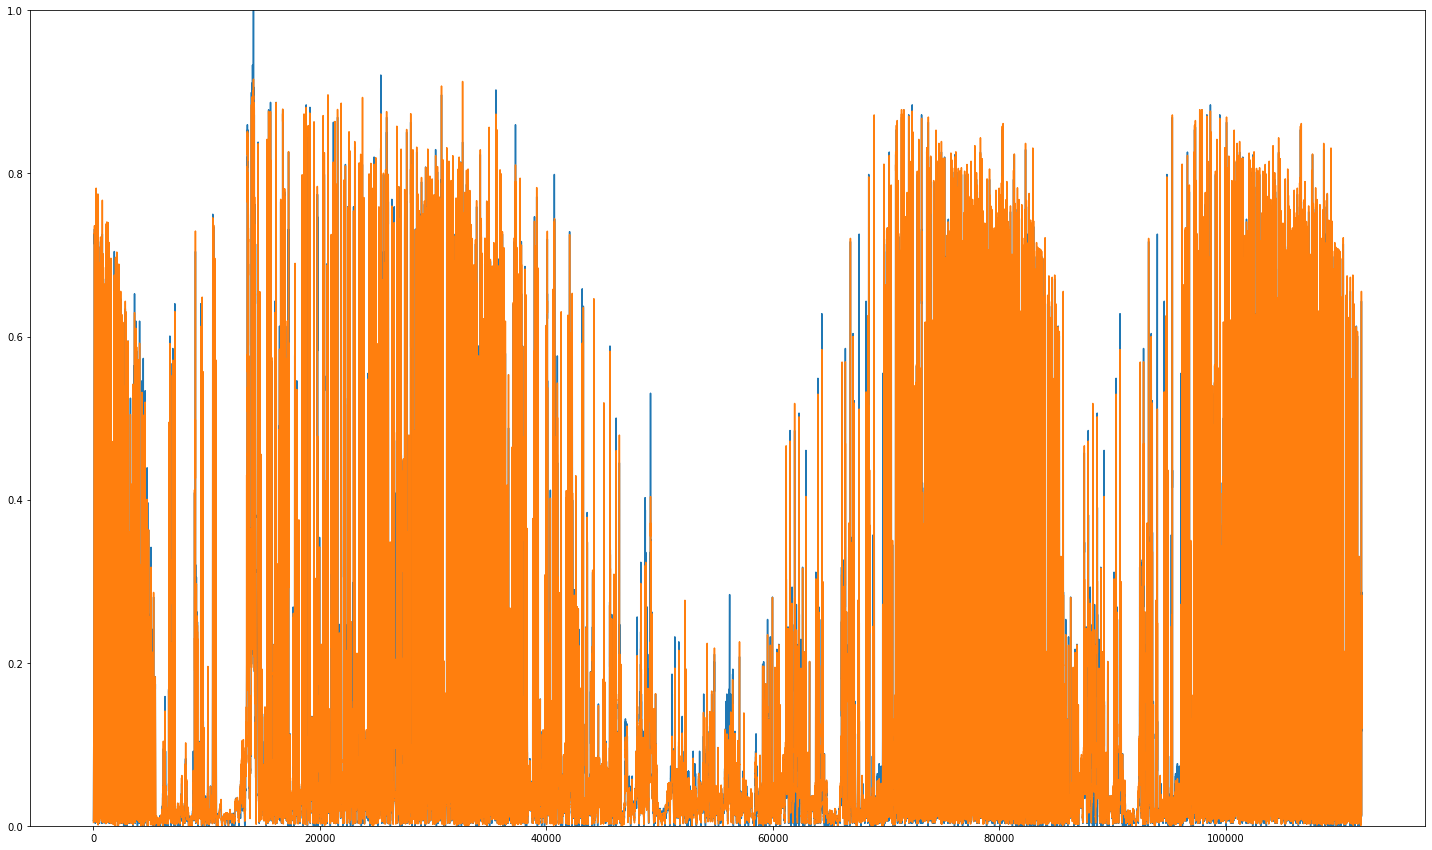

In [93]:
fig = plt.figure(figsize=(25,15))
solar_gen = dataset[:,-exclude-1]
plt.plot(solar_gen)
plt.plot(prediction)
plt.ylim([0, 1])

In [94]:
mean_absolute_percentage_error(solar_gen, prediction)

array([11.73939204])

In [95]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(solar_gen, prediction)

0.007860973213580858

## Saving the Model

In [96]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [97]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [98]:
# evaluate loaded model on test data
loaded_model.compile(loss = 'mean_absolute_error', optimizer='adam')

In [163]:
# evaluate dataset 
for i in range(11):
#     anormaly_Y = [test[ii][-exclude+i] for ii in range(len(test))]
    anormaly_Y = [test[ii][i] for ii in range(len(test))]
    score = mean_absolute_percentage_error(loaded_model.predict(testX), anormaly_Y)
    print(score)

[1829.1396]
[13.381857]
[24.232304]
[22.006992]
[86.8465]
[16.740782]
[24.359955]
[18.554548]
[14.842638]
[100.71576]
[26.540243]
